In [1]:
%pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./meetings.csv')
df.head()

,id_session,speaker_name,party,speech
0,25341,O SR. PRESIDENTE RODRIGO PACHECO,Rodrigo Pacheco. Bloco Parlamentar PSD/Republi...,Declaro aberta a sessão. Sob a proteção de Deu...
1,25341,O SR. OMAR AZIZ,Bloco Parlamentar PSD/Republicanos/PSD - AM,"Questão de ordem, Sr. Presidente. Sr. Presiden..."
2,25341,O SR. PRESIDENTE RODRIGO PACHECO,Rodrigo Pacheco. Bloco Parlamentar PSD/Republi...,Eu peço a permissão dos Srs. Senadores e das S...
3,25341,O SR. OMAR AZIZ,Bloco Parlamentar PSD/Republicanos/PSD - AM,"Sr. Presidente, uma questão de ordem, por favor."
4,25341,O SR. PRESIDENTE OMAR AZIZ,Omar Aziz. Bloco Parlamentar PSD/Republicanos/...,"Pois não. Senador Omar Aziz, para uma questão ..."


In [3]:
# Check for missing values
print('\nSummary - Missing Values')
print(df.isnull().sum())

# Remove rows from empty id_session 25779
df = df[df['id_session'] != 25779]

# Replace missing values in the 'speech' column with an empty string
df['speech'] = df['speech'].fillna('')

# Basic statistics for text length might be useful
df['speech_length'] = df['speech'].apply(len)
df['speech_word_count'] = df['speech'].apply(lambda x: len(x.split()))

# Check data types and look for obvious issues
print('\nSummary - Data Types')
print(df.info())

# Simple descriptive statistics
print('\nSummary - Descriptive Statistics')
print(df.describe())

# Count unique id_session values
print('\nSummary - Unique id_session values')
print(df['id_session'].nunique())



Summary - Missing Values
id_session      0
speaker_name    1
party           1
speech          5
dtype: int64

Summary - Data Types
<class 'pandas.core.frame.DataFrame'>
Index: 24611 entries, 0 to 24611
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_session         24611 non-null  int64 
 1   speaker_name       24611 non-null  object
 2   party              24611 non-null  object
 3   speech             24611 non-null  object
 4   speech_length      24611 non-null  int64 
 5   speech_word_count  24611 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ MB
None

Summary - Descriptive Statistics
         id_session  speech_length  speech_word_count
count  24611.000000   24611.000000       24611.000000
mean   25609.792207    1007.971842         167.798017
std      155.654317    1907.032232         318.677484
min    25334.000000       0.000000           0.000000
25%    25495.000000      47.0

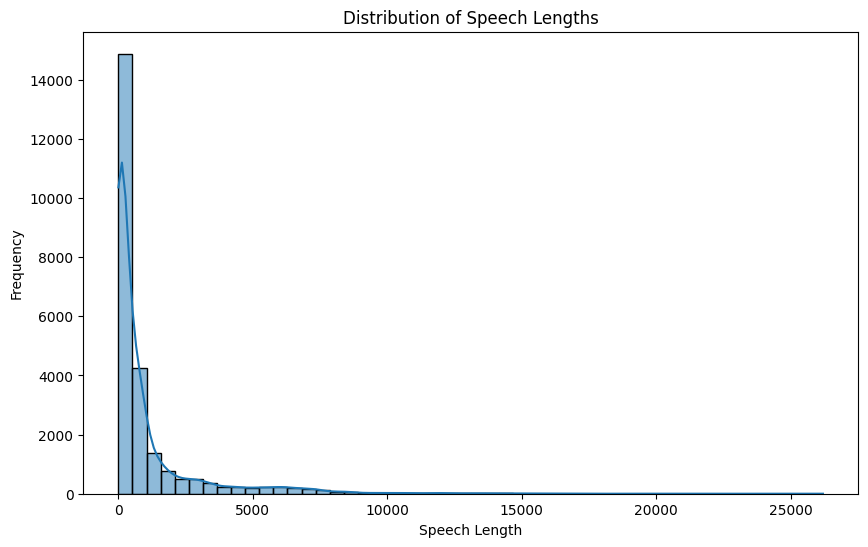

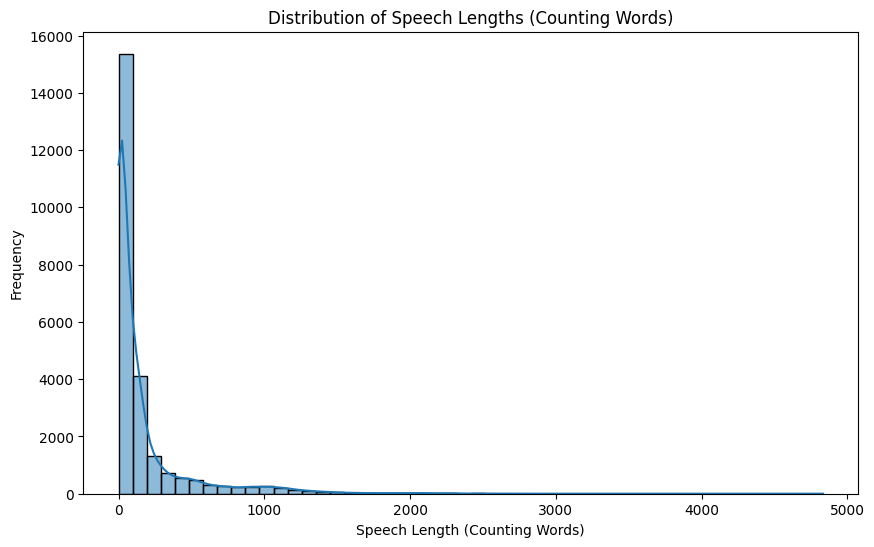

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['speech_length'], bins=50, kde=True)
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length')
plt.ylabel('Frequency')
# Poucas pessoas tem um grande discurso de uma só vez
plt.show()

# Plot a figure with distributions of counting words for each speech
plt.figure(figsize=(10, 6))
sns.histplot(df['speech_word_count'], bins=50, kde=True)
plt.title('Distribution of Speech Lengths (Counting Words)')
plt.xlabel('Speech Length (Counting Words)')
plt.ylabel('Frequency')

plt.show()


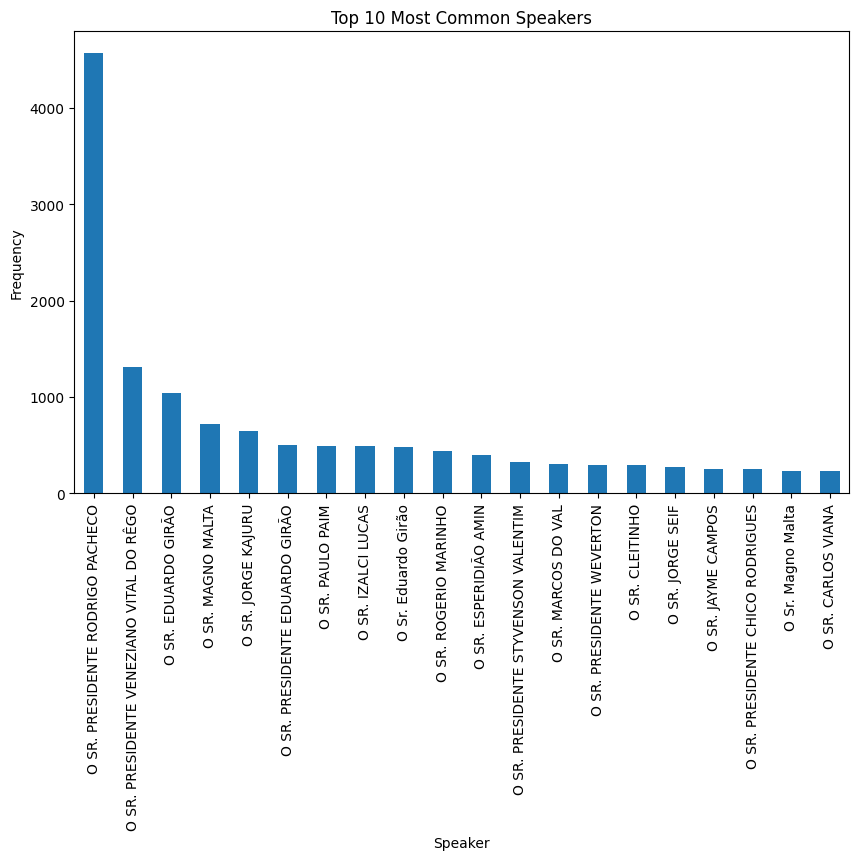

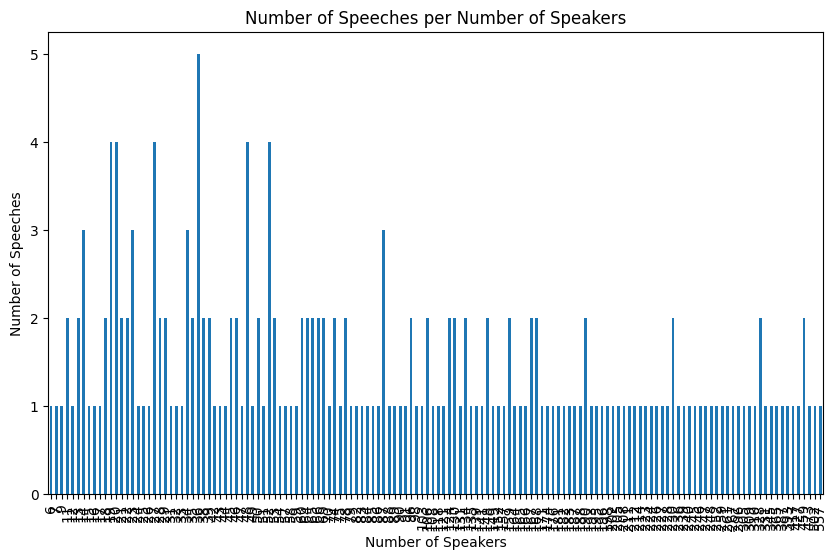

In [5]:
# Plot figure with the top 20 most common speakers names
plt.figure(figsize=(10, 6))
df['speaker_name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 10 Most Common Speakers')
plt.xlabel('Speaker')
plt.ylabel('Frequency')
plt.show()

# Plot qty of speeches per number of speakers
plt.figure(figsize=(10, 6))
df['id_session'].value_counts().value_counts().sort_index().plot(kind='bar')
plt.title('Number of Speeches per Number of Speakers')
plt.xlabel('Number of Speakers')
plt.ylabel('Number of Speeches')
plt.show()

# Identify sessions sizes

In [6]:
%pip install tiktoken

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
meetings_df = pd.read_csv('./meetings.csv')

# Remove rows from empty id_session 25779
meetings_df = meetings_df[meetings_df['id_session'] != 25779]

# Replace missing values in the 'speech' column with an empty string
meetings_df['speech'] = meetings_df['speech'].fillna('')

SMALL_TO_MEDIUM_THRESHOLD = 15000
MEDIUM_TO_BIG_THRESHOLD = 60000

In [8]:
import tiktoken

def get_tokens_number(text):
    enc = tiktoken.encoding_for_model('gpt-3.5-turbo')
    return len(enc.encode(text))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


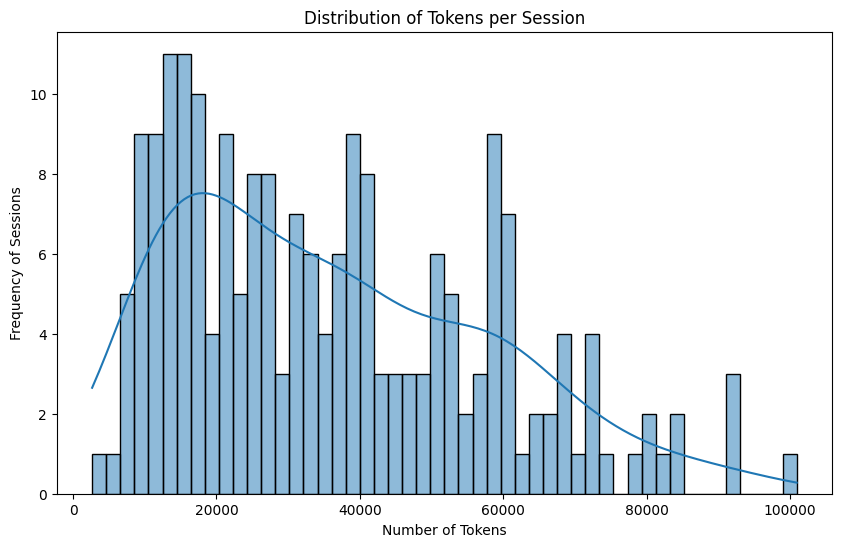

In [9]:
qty_tokens = {}
unique_id_session = meetings_df['id_session'].unique()

for id_session in unique_id_session:
    # Get all text from session concatenated with speaker_name and speech
    text = ' '.join(meetings_df[meetings_df['id_session'] == id_session]['speaker_name'] + ' ' + meetings_df[meetings_df['id_session'] == id_session]['speech'])

    # Get number of tokens
    qty_tokens[id_session] = get_tokens_number(text)

# plot qty of tokens per session
plt.figure(figsize=(10, 6))
sns.histplot(qty_tokens.values(), bins=50, kde=True)
plt.title('Distribution of Tokens per Session')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency of Sessions')
plt.legend().remove()
plt.show()

# Define Small, Medium and Big sessions

In [10]:
small_sessions = [int(k) for k, v in qty_tokens.items() if v < SMALL_TO_MEDIUM_THRESHOLD]
medium_sessions = [int(k) for k, v in qty_tokens.items() if SMALL_TO_MEDIUM_THRESHOLD <= v < MEDIUM_TO_BIG_THRESHOLD]
big_sessions = [int(k) for k, v in qty_tokens.items() if v >= MEDIUM_TO_BIG_THRESHOLD]

Save to files

In [11]:
import json

print(f'Number of small sessions: {len(small_sessions)}')
with open('small_sessions.json', 'w') as f:
    json.dump(small_sessions, f)
print('Saved small_sessions.json')

print(f'Number of medium sessions: {len(medium_sessions)}')
with open('medium_sessions.json', 'w') as f:
    json.dump(medium_sessions, f)
print('Saved medium_sessions.json')

print(f'Number of big sessions: {len(big_sessions)}')
with open('big_sessions.json', 'w') as f:
    json.dump(big_sessions, f)
print('Saved big_sessions.json')
    

Number of small sessions: 41
Saved small_sessions.json
Number of medium sessions: 130
Saved medium_sessions.json
Number of big sessions: 32
Saved big_sessions.json


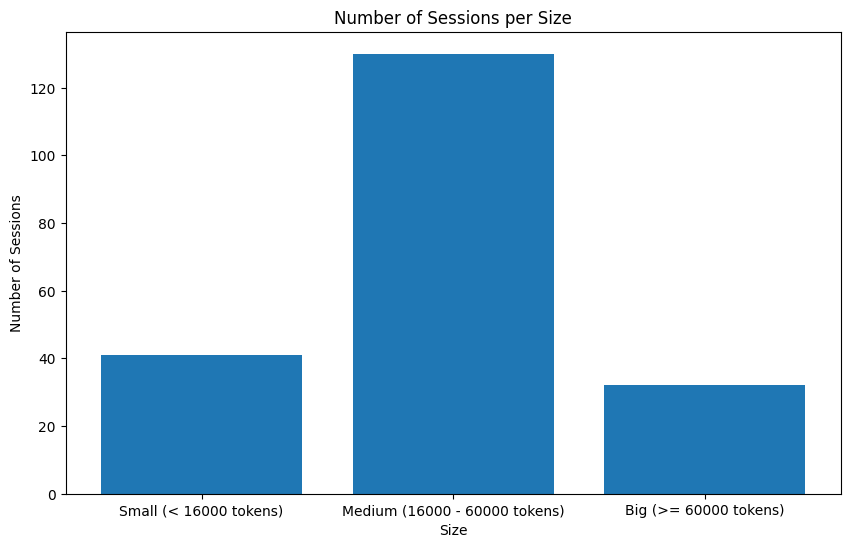

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(['Small (< 16000 tokens)', 'Medium (16000 - 60000 tokens)', 'Big (>= 60000 tokens)'], [len(small_sessions), len(medium_sessions), len(big_sessions)])
plt.title('Number of Sessions per Size')
plt.xlabel('Size')
plt.ylabel('Number of Sessions')

plt.show()

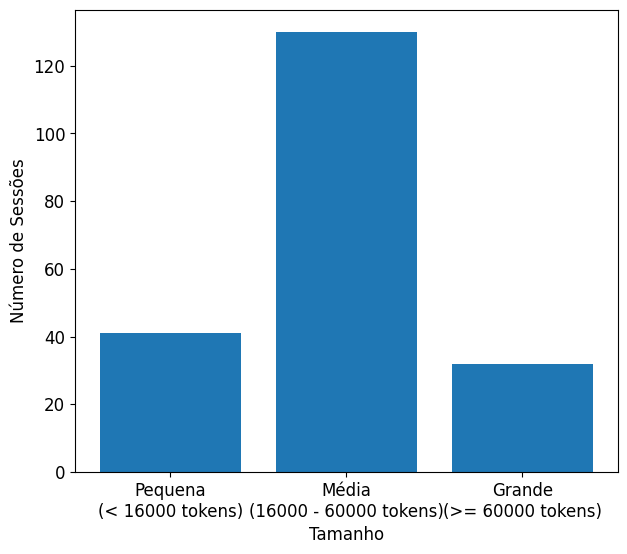

In [23]:
import matplotlib.pyplot as plt

# Definindo os dados
sizes = ['Pequena\n(< 16000 tokens)', 'Média\n(16000 - 60000 tokens)', 'Grande\n(>= 60000 tokens)']
session_counts = [len(small_sessions), len(medium_sessions), len(big_sessions)]

# Configurando o tamanho da figura e o estilo do gráfico
plt.figure(figsize=(7, 6))  # Quadrado
plt.rcParams.update({'font.size': 12})  # Ajustando o tamanho da fonte

# Criando o gráfico de barras
plt.bar(sizes, session_counts)

# Adicionando título e rótulos dos eixos
# plt.title('Número de Sessões por Tamanho')
plt.xlabel('Tamanho')
plt.ylabel('Número de Sessões')

# Mostrando o gráfico
plt.show()
